This tutorial is based on **Python for Data Analysis Part 16: Preparing Numeric Data**: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html

In [1]:
%matplotlib inline
import numpy as np              
import pandas as pd
from sklearn import preprocessing

**Dealing With Skewed Data**

The distribution of data - its overall shape and how it is spread out - can have a significant impact on analysis and modeling. Data that is roughly evenly spread around the mean value - known as normally distributed data - tends to be well-behaved. On the other hand, some data sets exhibit significant skewness or asymmetry. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f19aed0>]],
      dtype=object)

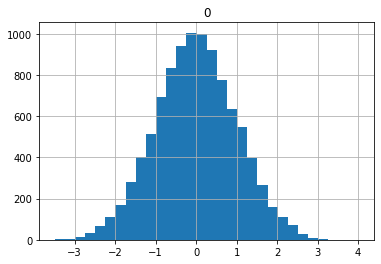

In [2]:
# Before we touch real data, let's generate a few sample distributions
normally_distributed = np.random.normal(size=10000)  # Generate normal data*

normally_distributed = pd.DataFrame(normally_distributed) # Convert to DF

normally_distributed.hist(bins=30)     # Plot histogram      

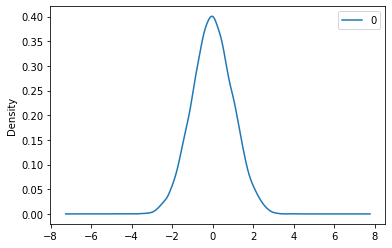

In [3]:
normally_distributed.plot.density()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10aa4f710>]],
      dtype=object)

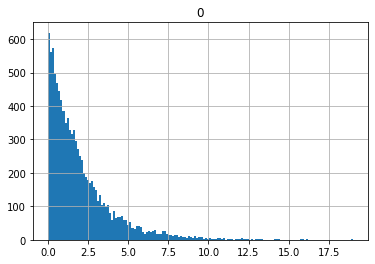

In [4]:
# Now let's generate some skewed data:
skewed = np.random.exponential(scale=2, size= 10000) # Generate skewed data
skewed = pd.DataFrame(skewed) # Convert to DF

skewed.hist(bins=150) # Plot histogram
                 

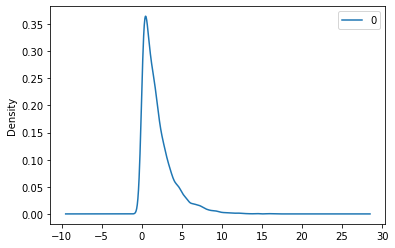

In [5]:
skewed.plot.density()

**Transforming Skewed Data**

Data with a long tail that goes off to the right is called positively skewed or right skewed. When you have a skewed distribution like the one above, the extreme values in the long tail can have a disproportionately large influence on whatever test you perform or models you build. Reducing skew may improve your results. Taking the square root of each data point or taking the natural logarithm of each data point are two simple transformations that can reduce skew.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fd73110>]],
      dtype=object)

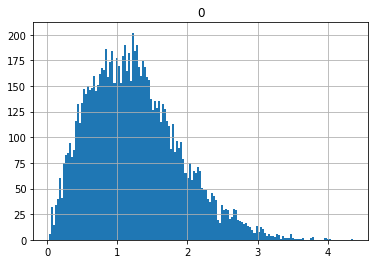

In [6]:
# Note: The df.apply() function applies a given function to each row or column of the DataFrame. 
# In this case we pass in np.sqrt to get the square root of each value.

sqrt_transformed = skewed.apply(np.sqrt) # Get the square root of data points*
sqrt_transformed.hist(bins=150) # Plot histogram
                    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fee1890>]],
      dtype=object)

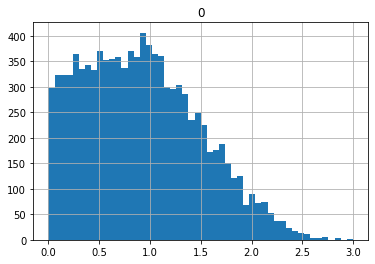

In [7]:
# Now let's try log transformation
log_transformed = (skewed+1).apply(np.log) # Get the log of the data

log_transformed.hist(bins=50) # Plot histogram
                           

** Now let's try to do this with our diabetes dataset **

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [9]:
df.index = df.id       # Set row index to patient ID name
df_num = df[['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 
             'height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip']]
df_num.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
id,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0
1001,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,46.0,48.0
1002,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,49.0,57.0
1003,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,33.0,38.0
1005,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,44.0,41.0


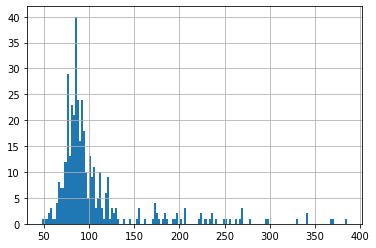

In [10]:
df_num["stab.glu"].hist(bins=150)

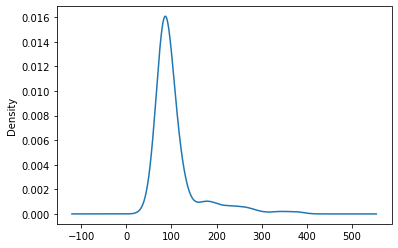

In [11]:
df_num["stab.glu"].plot.density()

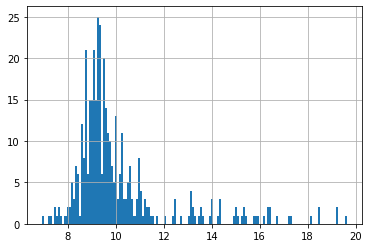

In [12]:
# Let's try to apply square root transformation
sqrt_transformed_col = df_num["stab.glu"].apply(np.sqrt) # Get the square root of data points*
sqrt_transformed_col.hist(bins=150) # Plot histogram

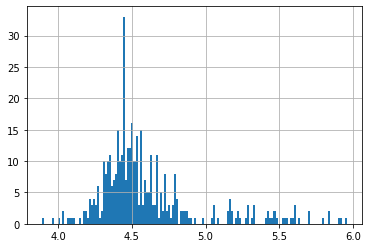

In [13]:
# Now let's try log transformation
log_transformed_col = (df_num["stab.glu"] + 1).apply(np.log) # Get the log of the data

log_transformed_col.hist(bins=150) # Plot histogram

** Other ways of transforming the data **

* Min-max scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

It **doesn’t reduce the effect of outliers**, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.


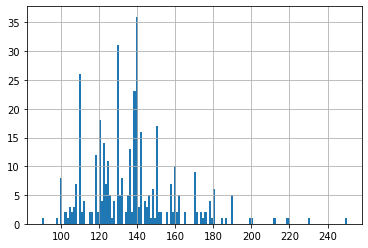

In [14]:
df["bp.1s"].hist(bins=150)

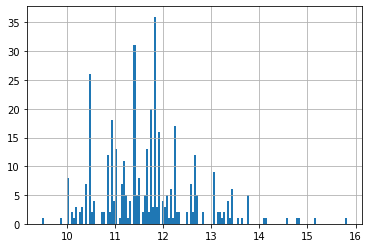

In [15]:
bp = df["bp.1s"].apply(np.sqrt)
bp.hist(bins=150)

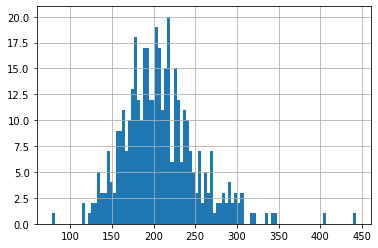

In [16]:
df_num['chol'].hist(bins=100)

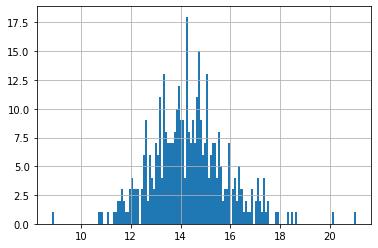

In [17]:
df_num['chol'].apply(np.sqrt).hist(bins=150)

In [12]:
df_num.describe()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


In [15]:
df_num[['weight','waist']].corr()

,weight,waist
weight,1.000000,0.849855
waist,0.849855,1.000000
